## **1. Using the PlayTennis dataset, train:**

In [3]:
import pandas as pd
df = pd.read_csv("PlayTennis.csv")
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [4]:
for col in df.columns:
    print(col)

Outlook
Temperature
Humidity
Wind
Play Tennis


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [6]:
x = df.drop(labels='Play Tennis', axis=1)
y = df['Play Tennis']
print(x.head())
print(y[:5])

   Outlook  Temperature  Humidity  Wind
0        2            1         0     1
1        2            1         0     0
2        0            1         0     1
3        1            2         0     1
4        1            0         1     1
0    0
1    0
2    1
3    1
4    1
Name: Play Tennis, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)
print(f"Length of x train: {x_train.shape}")
print(f"Length of x test: {x_test.shape}")
print(f"Length of y train: {len(y_test)}")
print(f"Length of y test: {len(y_train)}")

Length of x train: (11, 4)
Length of x test: (3, 4)
Length of y train: 3
Length of y test: 11


## **1.a) An ID3 decision tree (criterion = entropy)**

In [72]:
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree, export_text
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt

In [ ]:
m1 = DecisionTreeClassifier(criterion='entropy')
m1.fit(x_train, y_train)
m1_preds = m1.predict(x_test)
m1_acc = accuracy_score(y_test, m1_preds) * 100
print(f"Accuracy score of m1: {m1_acc}")
print(f"Depth of tree {m1.get_depth()}")

m1_train_preds = m1.predict(x_train)
m1_train_acc = accuracy_score(y_train, m1_train_preds) * 100
print(f"Accuracy score of m1 on training data: {m1_train_acc}")

Accuracy score of m1: 100.0
Depth of tree 4
Accuracy score of m1 on training data: 100.0


In [78]:
root_feature_index = m1.tree_.feature[0]
print(f"Root split feature for m1: {x_train.columns[root_feature_index]}")
print(f"Leaves in m1: {m1.get_n_leaves()}")

Root split feature for m1: Outlook
Leaves in m1: 7


|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Humidity <= 0.50
|   |   |--- Wind <= 0.50
|   |   |   |--- class: 0
|   |   |--- Wind >  0.50
|   |   |   |--- Outlook <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Outlook >  1.50
|   |   |   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- Outlook <= 1.50
|   |   |   |--- Wind <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Wind >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Outlook >  1.50
|   |   |   |--- class: 1



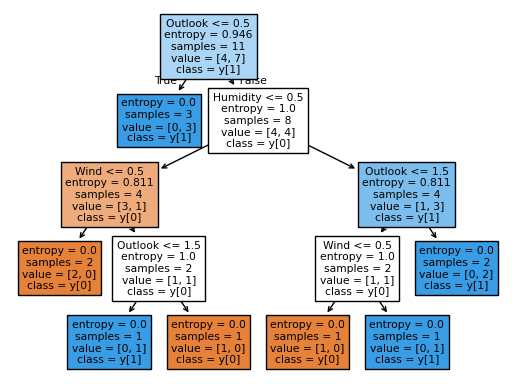

In [ ]:
plot_tree(m1, feature_names=x_train.columns, class_names=True, filled=True)
print(export_text(m1, feature_names=list(x_train.columns)))

## **b) A CART decision tree (criterion = gini)**

In [ ]:
m2 = DecisionTreeClassifier(criterion='gini')
m2.fit(x_train, y_train)
m2_preds = m2.predict(x_test)
m2_acc = accuracy_score(y_test, m2_preds) * 100
print(f"Accuracy score of m2: {m2_acc}")
print(f"Depth of tree {m2.get_depth()}")

m2_train_preds = m2.predict(x_train)
m2_train_acc = accuracy_score(y_train, m2_train_preds) * 100
print(f"Accuracy score of m2 on training data: {m2_train_acc}")

Accuracy score of m2: 100.0
Depth of tree 4
Accuracy score of m2 on training data: 100.0


In [80]:
root_feature_index = m2.tree_.feature[0]
print(f"Root split feature for m2: {x_train.columns[root_feature_index]}")
print(f"Leaves in m2: {m2.get_n_leaves()}")

Root split feature for m2: Outlook
Leaves in m2: 7


|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Wind <= 0.50
|   |   |--- Outlook <= 1.50
|   |   |   |--- class: 0
|   |   |--- Outlook >  1.50
|   |   |   |--- Temperature <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Temperature >  1.50
|   |   |   |   |--- class: 1
|   |--- Wind >  0.50
|   |   |--- Temperature <= 1.00
|   |   |   |--- class: 1
|   |   |--- Temperature >  1.00
|   |   |   |--- Outlook <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Outlook >  1.50
|   |   |   |   |--- class: 0



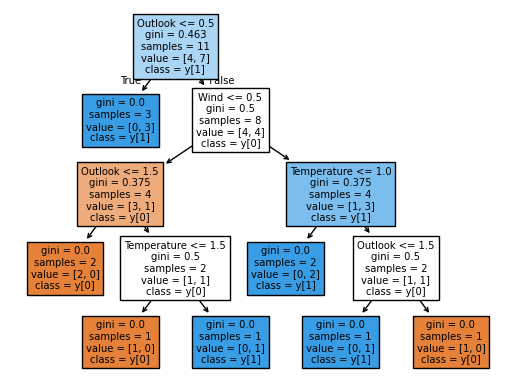

In [ ]:
plot_tree(m2, feature_names=x_train.columns, class_names=True, filled=True)
print(export_text(m2, feature_names=list(x_train.columns)))

## **1. c) A Bagging ensemble using decision trees as base estimators**

In [ ]:
base_tree = DecisionTreeClassifier()
m3 = BaggingClassifier(estimator=base_tree,
    n_estimators=10,
    max_samples=0.9,
    oob_score=True,
    random_state=42
)
m3.fit(x_train, y_train)
m3_preds = m3.predict(x_test)
m3_acc = accuracy_score(y_test, m3_preds) * 100
print(f"Accuracy score of m3: {m3_acc}")

m3_train_preds = m3.predict(x_train)
m3_train_acc = accuracy_score(y_train, m3_train_preds) * 100
print(f"Accuracy score of m3 on training data: {m3_train_acc}")
print(f"OOB score on training data: {m3.oob_score_ * 100:.2f}%")

Accuracy score of m3: 100.0
Depth of tree 2
Accuracy score of m3 on training data: 100.0
OOB score on training data: 45.45%


In [ ]:
depths = [tree.get_depth() for tree in m3.estimators_]
avg_depth = sum(depths) / len(depths)
print(f"Average depth of Bagging trees: {avg_depth:.2f}")

Average depth of Bagging trees: 2.60


In [81]:
tree_0 = m3.estimators_[0]
root_feature_index = tree_0.tree_.feature[0]
print(f"Root split feature for m3: {x_train.columns[root_feature_index]}")
print(f"Leaves in m3: {tree_0.get_n_leaves()}")

Root split feature for m3: Outlook
Leaves in m3: 3


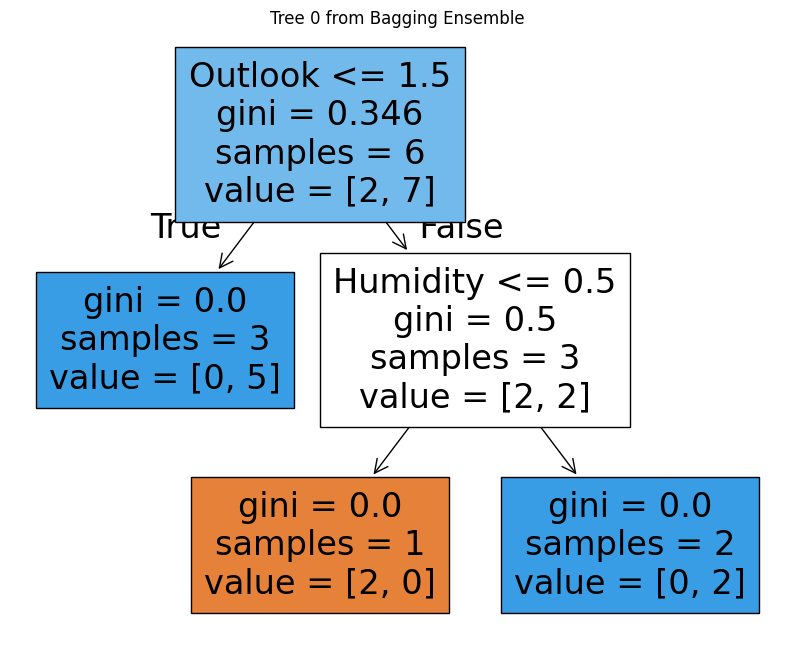

In [ ]:
plt.figure(figsize=(10, 8))
plot_tree(tree_0, feature_names=x_train.columns, filled=True)
plt.title("Tree 0 from Bagging Ensemble")
plt.show()

## **2. For each model:**
## **a) Identify the root node and main split attributes.**
## **c) Compute and interpret entropy and Gini impurity for one internal node.**
## **d) Report training accuracy and, for bagging, the OOB error.**
## **e) Compare tree structure and performance across models.**

<table>
<tr>  <td>TREES</td>  <td>ID3 DECISION TREE</td>  <td>CART DECISION TREE</td>  <td>BAGGING ENSEMBLE</td> </tr>
<tr>  <td>ROOT NODE</td>  <td>Outlook</td>  <td>Outlook</td>  <td>Outlook</td>  </tr>
<tr>  <td>CRITERION</td>  <td>Entropy</td>  <td>Gini</td>  <td>Gini</td>  </tr>
<tr>  <td>CRITERION VALUE</td>  <td>0.811 (wind)</td>  <td>0.5 (wind)</td>  <td>0.5 (Humidity)</td>  </tr>
<tr>  <td>TRAINING ACCURACY</td>  <td>100</td>  <td>66</td>  <td>45.45 (oob)</td>  </tr>
<tr>  <td>TESTING ACCURACY</td>  <td>100</td>  <td>100</td>  <td>100 (accuracy)</td>  </tr>
<tr>  <td>DEPTH</td>  <td>4</td>  <td>4</td>  <td>2</td>  </tr>
<tr>  <td>TREES</td>  <td>7</td>  <td>7</td>  <td>3</td>  </tr>
</table>

## **3. Discuss briefly:**
## **a) What is the role of bootstrap sampling in bagging?**
* Bootstrap sampling means drawing random samples with replacement from the training data to train each decision tree.
* It is used to introduces diversity among the base models.
* It reduces overfitting by averaging out the noise from individual models.

## **b) How does bagging influence variance and bias?**
* Bagging reduces variance by averaging predictions from diverse models. This stabilizes the output and makes it less sensitive to fluctuations in the training data.
* Bagging does not significantly reduce bias. If the base model is biased (e.g., underfitting), bagging won’t fix that.
* So, bagging is most effective when used with high-variance, low-bias models like decision trees.

## **c) Why is OOB error considered an unbiased estimate of test performance?**
* OOB (Out-of-Bag) error is calculated by evaluating each sample using only the models that did not see that sample during training.
* Each prediction is made by models that were not trained on that sample.
* It mimics the behavior of a test set without needing a separate validation split.